# ML Google Developers 

Las presentes sesiones se basan en los videos realizados por el equipo de Google (Josh Gordon).

Canal youtube: https://www.youtube.com/watch?v=N9fDIAflCMY&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=2

### Sesión 1

https://www.youtube.com/watch?v=cKxRvEZd3Mw

In [1]:
from sklearn import tree

¿Por qué cambio de palabras por números?.  Pues los modelos usan representaciones matematicas para variables cuantitativas.

In [5]:
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
labels = [0,0,1,1]

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

In [7]:
print (clf.predict([[160, 1]]))

[1]


### Sesión 2

https://www.youtube.com/watch?v=tNa99PG8hR8

Se usa la base de datos Iris para este experimento. El link para obtener la data es: 
http://scikit-learn.org/stable/datasets/


In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

Analizando la metadata

In [9]:
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


In [11]:
print iris.data[0]

[ 5.1  3.5  1.4  0.2]


In [12]:

print iris.target[100]

2


In [13]:
for i in range(len(iris.target)):
    print "Ejemplo %d: etiqueta %s, caracteristica %s" % (i, iris.target[i], iris.data[i])

Ejemplo 0: etiqueta 0, caracteristica [ 5.1  3.5  1.4  0.2]
Ejemplo 1: etiqueta 0, caracteristica [ 4.9  3.   1.4  0.2]
Ejemplo 2: etiqueta 0, caracteristica [ 4.7  3.2  1.3  0.2]
Ejemplo 3: etiqueta 0, caracteristica [ 4.6  3.1  1.5  0.2]
Ejemplo 4: etiqueta 0, caracteristica [ 5.   3.6  1.4  0.2]
Ejemplo 5: etiqueta 0, caracteristica [ 5.4  3.9  1.7  0.4]
Ejemplo 6: etiqueta 0, caracteristica [ 4.6  3.4  1.4  0.3]
Ejemplo 7: etiqueta 0, caracteristica [ 5.   3.4  1.5  0.2]
Ejemplo 8: etiqueta 0, caracteristica [ 4.4  2.9  1.4  0.2]
Ejemplo 9: etiqueta 0, caracteristica [ 4.9  3.1  1.5  0.1]
Ejemplo 10: etiqueta 0, caracteristica [ 5.4  3.7  1.5  0.2]
Ejemplo 11: etiqueta 0, caracteristica [ 4.8  3.4  1.6  0.2]
Ejemplo 12: etiqueta 0, caracteristica [ 4.8  3.   1.4  0.1]
Ejemplo 13: etiqueta 0, caracteristica [ 4.3  3.   1.1  0.1]
Ejemplo 14: etiqueta 0, caracteristica [ 5.8  4.   1.2  0.2]
Ejemplo 15: etiqueta 0, caracteristica [ 5.7  4.4  1.5  0.4]
Ejemplo 16: etiqueta 0, caracteris

### Pasos para crear modelos de ML



### 1. Importar un dataset

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [15]:
iris = load_iris()
test_idx =[0,50,100]

### 2. Entrenar un clasificador

In [16]:
# Datos de entrenamiento
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

In [17]:
# Datos de prueba
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

In [18]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
print test_target

[0 1 2]


In [20]:
print clf.predict(test_data)

[0 1 2]


### 3. Predecir una nueva etiqueta para una nueva flor

Para generar los graficos se utiliza una libreria independiente: http://graphviz.org/.

Existe un problema con pydot. La versión cambio asi que hay que instalar la anterior para no tener problemas. En algunos casos ;) http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will

pip uninstall pyparsing

pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz#md5=9be0fcdcc595199c646ab317c1d9a709

pip install pydot


In [21]:
from sklearn.externals.six import StringIO

In [22]:
# viz code 
from sklearn.externals.six import StringIO
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, 
                         out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         impurity=False) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 


In [23]:
graph.write_pdf("iris.pdf") 

True

Para visualizar el archivo pdf que se crea:  http://stackoverflow.com/questions/19470099/view-pdf-image-in-an-ipython-notebook

In [24]:
class PDF(object):
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size
    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)
    
    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

    

In [25]:
PDF('iris.pdf', size=(800,450))

### Sesión 3. Good Feature

https://www.youtube.com/watch?v=N9fDIAflCMY&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=2

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
greyhounds = 500
labs = 500

In [28]:
grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

([array([   0.,    1.,   16.,   39.,   89.,  156.,  129.,   47.,   21.,    2.]),
  array([   7.,   23.,   87.,  161.,  218.,  249.,  172.,   59.,   22.,    2.])],
 array([ 11.87616462,  14.74372904,  17.61129345,  20.47885787,
         23.34642228,  26.2139867 ,  29.08155111,  31.94911553,
         34.81667994,  37.68424436,  40.55180878]),
 <a list of 2 Lists of Patches objects>)

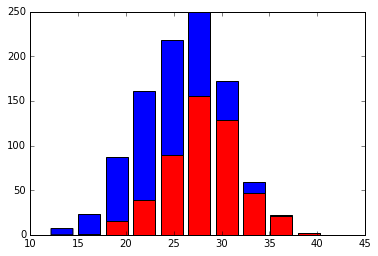

In [29]:
plt.hist([grey_height, lab_height], stacked=True, color=['r','b'])


Correlacion Ver


Continuando Ahora se probará la tecnica del vecino mas cercano



In [30]:
import sklearn
sklearn.__version__

'0.17.1'

In [31]:
from sklearn.neighbors import NearestNeighbors

In [32]:
my_classifier = NearestNeighbors(n_neighbors=1)

### Session 4

https://www.youtube.com/watch?v=84gqSbLcBFE&list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal&index=1

In [33]:
from sklearn import datasets
iris = datasets.load_iris()

In [34]:
X = iris.data
y = iris.target

In [35]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .5)

In [36]:
from sklearn import tree
my_classifier = tree.DecisionTreeClassifier()

In [37]:
my_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
predictions = my_classifier.predict(X_test)

In [39]:
print predictions

[0 0 2 2 2 1 0 0 0 1 2 2 1 0 0 0 2 2 0 0 1 2 1 2 1 1 1 1 0 0 1 1 2 0 1 2 2
 1 0 0 1 1 0 0 2 0 0 1 1 0 2 2 1 2 0 1 2 2 2 1 0 2 0 1 2 1 0 2 0 2 2 0 1 2
 0]


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print accuracy_score(y_test, predictions)

0.96


In [42]:
from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

In [43]:
my_classifier.fit(X_train, y_train)
predictions = my_classifier.predict(X_test)

In [44]:
print accuracy_score(y_test, predictions)

0.986666666667
